In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
%matplotlib inline

In [23]:
df = pd.read_csv(r'C:\Users\aditi\Downloads\customer_booking.csv', encoding="ISO-8859-1")


In [24]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [25]:
df.isnull()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [27]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: >

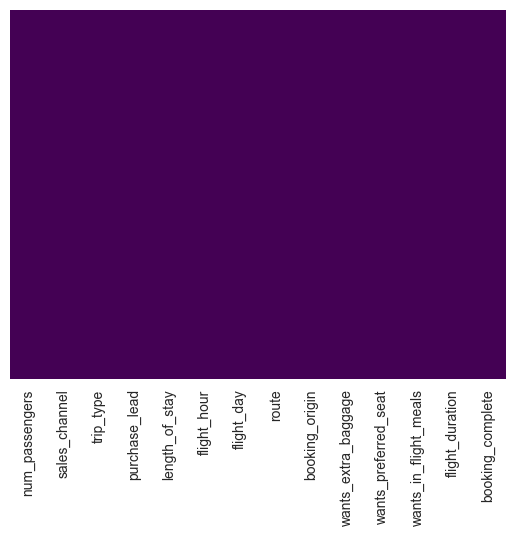

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## EDA Exploratory Data Analysis

<Axes: xlabel='booking_complete', ylabel='count'>

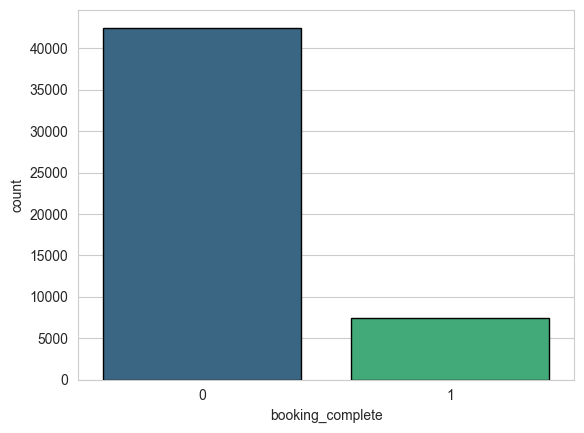

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='booking_complete',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='wants_in_flight_meals', ylabel='count'>

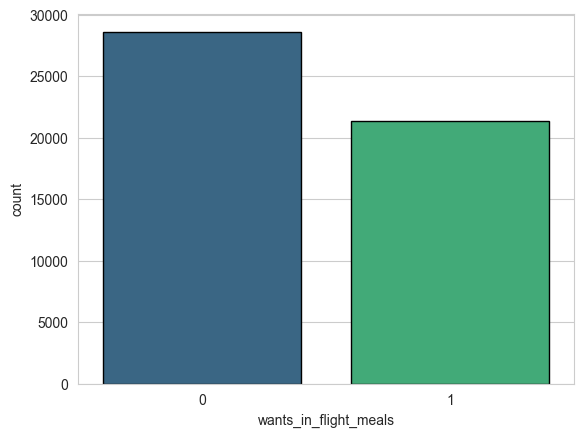

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='wants_in_flight_meals',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='wants_preferred_seat', ylabel='count'>

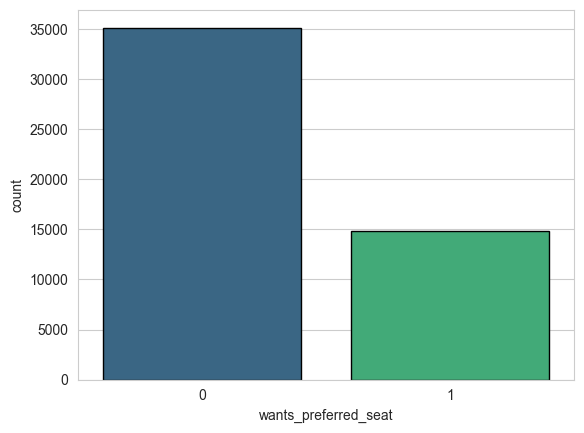

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='wants_preferred_seat',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='wants_extra_baggage', ylabel='count'>

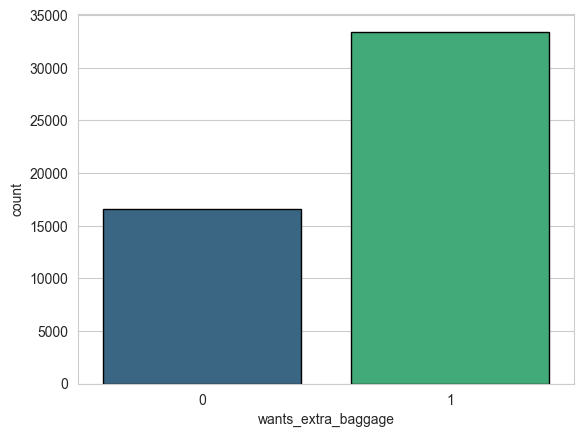

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='wants_extra_baggage',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='flight_day', ylabel='count'>

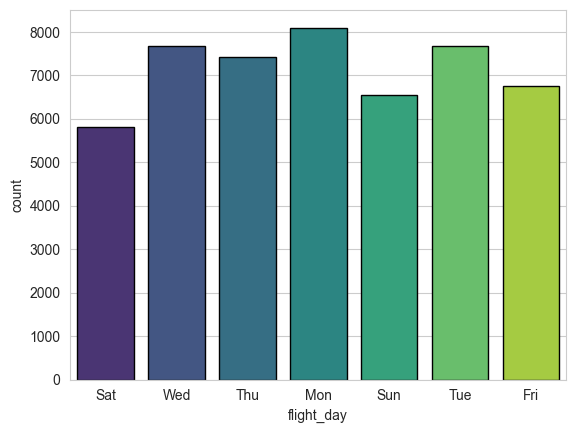

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='flight_day',data=df,palette='viridis',saturation=0.8,edgecolor="black")

<Axes: xlabel='booking_complete', ylabel='count'>

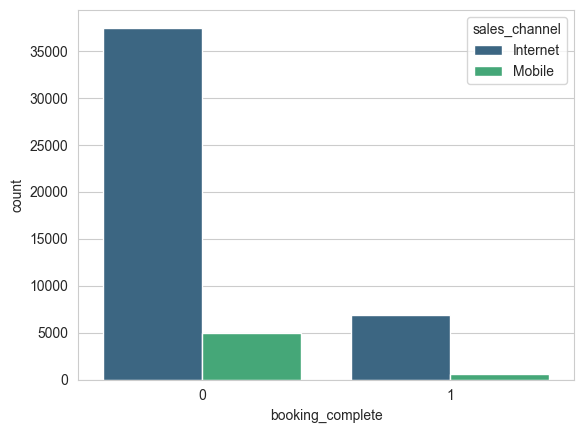

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='booking_complete',hue='sales_channel',data=df,palette='viridis')

Text(0, 0.5, 'Number of bookings')

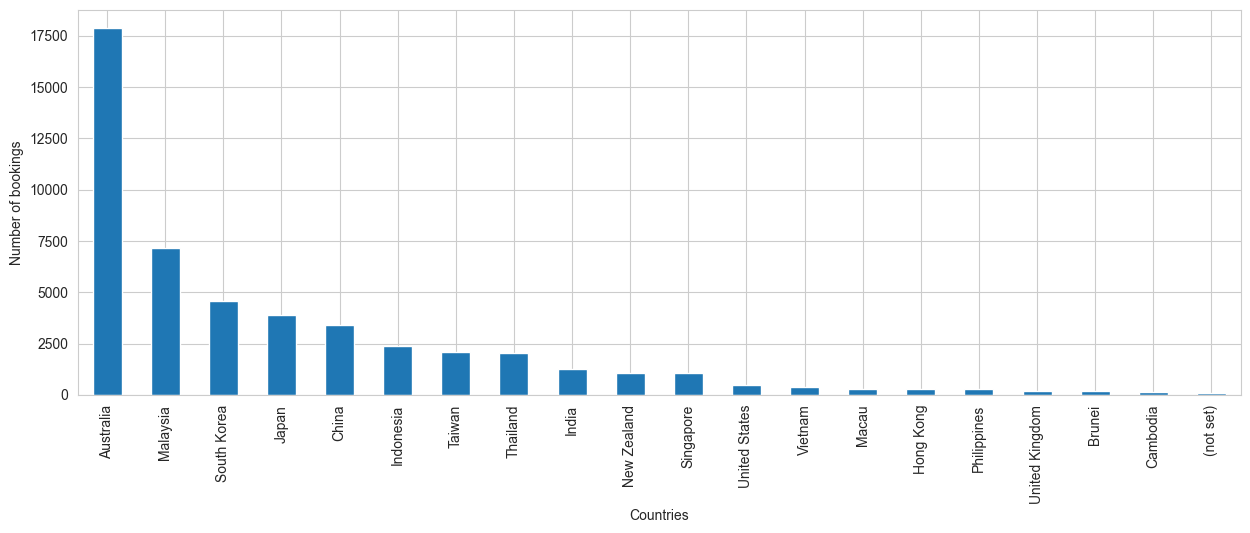

In [35]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

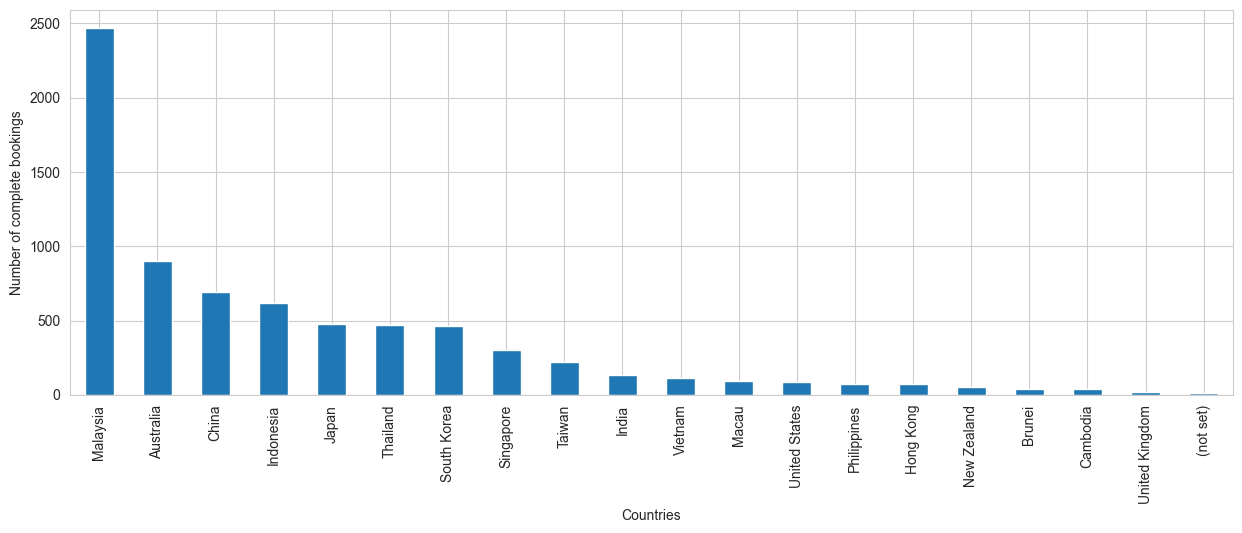

In [36]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [50]:
original_df = df

In [51]:
df_final = df

In [52]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [53]:

df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [54]:
label = df['booking_complete']

In [55]:
df_final = df_final.drop('booking_complete', axis=1)

In [56]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,Sat,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,Sat,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,Wed,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,Sat,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,Wed,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,Sat,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,Sun,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,Sat,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,Mon,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [57]:
# from sklearn.preprocessing import StandardScaler

# #create a standard scaler object
# scaler = StandardScaler()

# #fit and transform the data
# scaled_df = scaler.fit_transform(df_final)

In [58]:
numeric_df = df_final.select_dtypes(include=[np.number])

# # Handle missing values if necessary
numeric_df.fillna(0, inplace=True)

# # Scale the numeric data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numeric_df)

In [59]:
print(scaled_df.shape)
print(df_final.columns[:-1].shape)

(50000, 13)
(13,)


In [61]:
scaled_df['label']  = label

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [39]:
scaled_df

array([[ 0.40068439,  1.95753005, -0.11935316, ..., -0.64991859,
        -0.86349708, -1.17417457],
       [-0.57955926,  0.29916394, -0.08984361, ..., -0.64991859,
        -0.86349708, -1.17417457],
       [ 0.40068439,  1.74747034, -0.0308245 , ...,  1.53865425,
        -0.86349708, -1.17417457],
       ...,
       [-0.57955926, -0.67374418, -0.50297735, ..., -0.64991859,
         1.15808151, -1.10736752],
       [-0.57955926, -0.77324614, -0.50297735, ..., -0.64991859,
         1.15808151, -1.10736752],
       [-0.57955926, -0.72902305, -0.50297735, ...,  1.53865425,
        -0.86349708, -1.10736752]])

<Axes: >

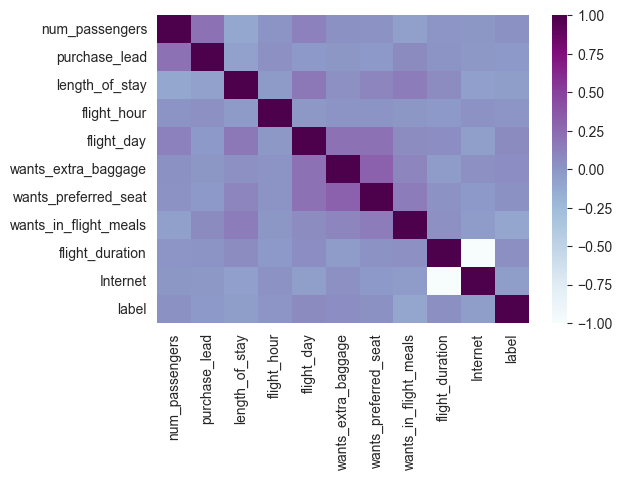

In [50]:
corr = scaled_df.corr()

plt.figure(figsize=(6,4))

#plot the heatmap
sns.heatmap(corr,cmap = 'BuPu')

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
X=df.drop('label',axis=1)
y=df.label

KeyError: "['label'] not found in axis"